In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **TEMP ALG3**

In [ ]:
import pandas as pd
 
temp_alg3 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/temp_alg3.csv")
temp_alg3 = temp_alg3.drop(['Unnamed: 0'], axis=1)
print(temp_alg3)

     id  alg  time    3    4    5    6    7    8    9  ...  99993  99994  \
0     1    1     1  941  939  941  941  941  940  940  ...    941    941   
1     1    1     2  941  941  941  942  940  940  940  ...    941    940   
2     1    1     3  941  941  940  941  940  939  940  ...    941    940   
3     1    1     4  941  941  940  939  940  940  940  ...    939    940   
4     1    1     5  941  940  940  940  940  940  940  ...    940    941   
..   ..  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
995  10    1   996  939  939  941  939  940  939  940  ...    940    938   
996  10    1   997  941  941  940  938  940  939  940  ...    938    939   
997  10    1   998  940  939  941  941  940  938  940  ...    940    939   
998  10    1   999  939  940  939  940  938  939  940  ...    940    940   
999  10    1  1000  939  940  939  939  939  940  939  ...    940    939   

     99995  99996  99997  99998  99999  100000  100001  100002  
0      941    940    9

In [ ]:
temp_alg3_diezmado = []
for i in range(len(temp_alg3)):
  if(i % 10 == 0):
    temp_alg3_diezmado = np.append(temp_alg3_diezmado, temp_alg3.iloc[i], axis = 0)
temp_alg3_diezmado = np.reshape(temp_alg3_diezmado, (100,100003))
temp_alg3_diezmado = pd.DataFrame(temp_alg3_diezmado)
print(temp_alg3_diezmado)

    0       1       2       3       4       5       6       7       8       \
0      1.0     1.0     1.0   941.0   939.0   941.0   941.0   941.0   940.0   
1      1.0     1.0    11.0   940.0   941.0   940.0   940.0   942.0   941.0   
2      1.0     1.0    21.0   940.0   941.0   940.0   941.0   943.0   940.0   
3      1.0     1.0    31.0   936.0   936.0   936.0   936.0   936.0   937.0   
4      1.0     1.0    41.0   937.0   938.0   938.0   937.0   936.0   937.0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
95    10.0     1.0   951.0   940.0   939.0   940.0   943.0   939.0   940.0   
96    10.0     1.0   961.0   939.0   938.0   939.0   938.0   940.0   940.0   
97    10.0     1.0   971.0   939.0   940.0   940.0   939.0   939.0   939.0   
98    10.0     1.0   981.0   939.0   939.0   939.0   940.0   940.0   939.0   
99    10.0     1.0   991.0   939.0   940.0   939.0   939.0   940.0   939.0   

    9       ...  99993   99994   99995   99996   99997   99998 

In [ ]:
Y = temp_alg3_diezmado.iloc[:,0]
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
95    10.0
96    10.0
97    10.0
98    10.0
99    10.0
Name: 0, Length: 100, dtype: float64

In [ ]:
X = temp_alg3_diezmado.iloc[:, 3:]
X

,3,4,5,6,7,8,9,10,11,12,...,99993,99994,99995,99996,99997,99998,99999,100000,100001,100002
0,941.0,939.0,941.0,941.0,941.0,940.0,940.0,940.0,941.0,940.0,...,941.0,941.0,941.0,940.0,940.0,941.0,941.0,941.0,941.0,940.0
1,940.0,941.0,940.0,940.0,942.0,941.0,940.0,943.0,941.0,941.0,...,941.0,941.0,940.0,941.0,939.0,940.0,940.0,940.0,941.0,939.0
2,940.0,941.0,940.0,941.0,943.0,940.0,941.0,941.0,940.0,941.0,...,940.0,939.0,941.0,941.0,940.0,939.0,942.0,941.0,940.0,941.0
3,936.0,936.0,936.0,936.0,936.0,937.0,937.0,936.0,937.0,937.0,...,936.0,938.0,937.0,936.0,936.0,936.0,937.0,936.0,937.0,938.0
4,937.0,938.0,938.0,937.0,936.0,937.0,937.0,936.0,937.0,937.0,...,937.0,937.0,937.0,936.0,937.0,936.0,937.0,936.0,937.0,937.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,940.0,939.0,940.0,943.0,939.0,940.0,940.0,940.0,938.0,938.0,...,939.0,940.0,938.0,939.0,941.0,938.0,940.0,938.0,939.0,940.0
96,939.0,938.0,939.0,938.0,940.0,940.0,939.0,939.0,940.0,940.0,...,938.0,940.0,939.0,940.0,940.0,939.0,939.0,938.0,939.0,939.0
97,939.0,940.0,940.0,939.0,939.0,939.0,939.0,939.0,940.0,939.0,...,940.0,939.0,940.0,940.0,940.0,939.0,939.0,941.0,940.0,938.0
98,939.0,939.0,939.0,940.0,940.0,939.0,939.0,940.0,939.0,940.0,...,940.0,939.0,939.0,940.0,939.0,939.0,939.0,940.0,940.0,939.0


### **kNN**

In [ ]:
skf = StratifiedKFold(n_splits=2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
classifier = KNeighborsClassifier(n_neighbors=4)
#fit the model using the training data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

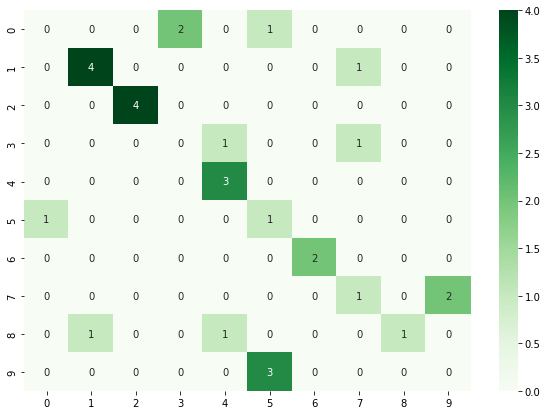

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.80      0.80      0.80         5
         3.0       1.00      1.00      1.00         4
         4.0       0.00      0.00      0.00         2
         5.0       0.60      1.00      0.75         3
         6.0       0.20      0.50      0.29         2
         7.0       1.00      1.00      1.00         2
         8.0       0.33      0.33      0.33         3
         9.0       1.00      0.33      0.50         3
        10.0       0.00      0.00      0.00         3

    accuracy                           0.53        30
   macro avg       0.49      0.50      0.47        30
weighted avg       0.54      0.53      0.51        30



### **Regresión Logística**

In [ ]:
skf = StratifiedKFold(n_splits=4)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred = log_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


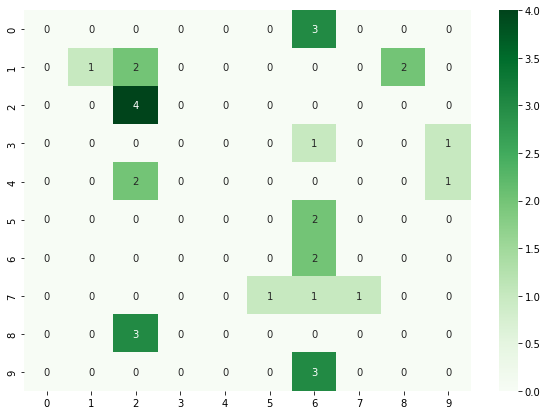

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       1.00      0.20      0.33         5
         3.0       0.36      1.00      0.53         4
         4.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         3
         6.0       0.00      0.00      0.00         2
         7.0       0.17      1.00      0.29         2
         8.0       1.00      0.33      0.50         3
         9.0       0.00      0.00      0.00         3
        10.0       0.00      0.00      0.00         3

    accuracy                           0.27        30
   macro avg       0.25      0.25      0.17        30
weighted avg       0.33      0.27      0.20        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **VOLT ALG3**

In [ ]:
import pandas as pd
 
volt_alg3 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/volt_alg3.csv")
volt_alg3 = volt_alg3.drop(['Unnamed: 0'], axis=1)
print(volt_alg3)

     id  alg  time     3     4     5     6     7     8     9  ...  99993  \
0     1    1     1  1490  1490  1492  1489  1491  1489  1489  ...   1489   
1     1    1     2  1489  1490  1489  1489  1490  1491  1490  ...   1489   
2     1    1     3  1489  1490  1490  1489  1489  1490  1490  ...   1490   
3     1    1     4  1490  1489  1489  1489  1489  1490  1490  ...   1490   
4     1    1     5  1489  1490  1490  1490  1490  1489  1489  ...   1490   
..   ..  ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
995  10    1   996  1503  1503  1503  1502  1504  1503  1503  ...   1503   
996  10    1   997  1502  1502  1502  1503  1503  1504  1503  ...   1503   
997  10    1   998  1503  1503  1503  1503  1503  1504  1504  ...   1503   
998  10    1   999  1503  1503  1503  1503  1502  1503  1503  ...   1503   
999  10    1  1000  1503  1502  1503  1503  1503  1502  1503  ...   1503   

     99994  99995  99996  99997  99998  99999  100000  100001  100002  
0     1490   14

In [ ]:
volt_alg3_diezmado = []
for i in range(len(volt_alg3)):
  if(i % 10 == 0):
    volt_alg3_diezmado = np.append(volt_alg3_diezmado, volt_alg3.iloc[i], axis = 0)
volt_alg3_diezmado = np.reshape(volt_alg3_diezmado, (100,100003))
volt_alg3_diezmado = pd.DataFrame(volt_alg3_diezmado)
print(volt_alg3_diezmado)

    0       1       2       3       4       5       6       7       8       \
0      1.0     1.0     1.0  1490.0  1490.0  1492.0  1489.0  1491.0  1489.0   
1      1.0     1.0    11.0  1490.0  1489.0  1490.0  1489.0  1491.0  1490.0   
2      1.0     1.0    21.0  1489.0  1490.0  1490.0  1490.0  1490.0  1490.0   
3      1.0     1.0    31.0  1490.0  1489.0  1490.0  1490.0  1490.0  1489.0   
4      1.0     1.0    41.0  1490.0  1490.0  1489.0  1490.0  1489.0  1490.0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
95    10.0     1.0   951.0  1504.0  1503.0  1504.0  1503.0  1503.0  1502.0   
96    10.0     1.0   961.0  1503.0  1502.0  1503.0  1503.0  1503.0  1502.0   
97    10.0     1.0   971.0  1503.0  1503.0  1503.0  1503.0  1503.0  1503.0   
98    10.0     1.0   981.0  1502.0  1503.0  1503.0  1503.0  1503.0  1503.0   
99    10.0     1.0   991.0  1503.0  1505.0  1502.0  1503.0  1503.0  1503.0   

    9       ...  99993   99994   99995   99996   99997   99998 

In [ ]:
Y = volt_alg3_diezmado.iloc[:,0]
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
95    10.0
96    10.0
97    10.0
98    10.0
99    10.0
Name: 0, Length: 100, dtype: float64

In [ ]:
X = volt_alg3_diezmado.iloc[:, 3:]
X

,3,4,5,6,7,8,9,10,11,12,...,99993,99994,99995,99996,99997,99998,99999,100000,100001,100002
0,1490.0,1490.0,1492.0,1489.0,1491.0,1489.0,1489.0,1489.0,1489.0,1490.0,...,1489.0,1490.0,1490.0,1491.0,1490.0,1489.0,1490.0,1489.0,1489.0,1490.0
1,1490.0,1489.0,1490.0,1489.0,1491.0,1490.0,1489.0,1490.0,1490.0,1490.0,...,1489.0,1489.0,1490.0,1490.0,1490.0,1490.0,1489.0,1489.0,1492.0,1489.0
2,1489.0,1490.0,1490.0,1490.0,1490.0,1490.0,1489.0,1489.0,1490.0,1489.0,...,1489.0,1490.0,1490.0,1490.0,1490.0,1490.0,1491.0,1489.0,1489.0,1490.0
3,1490.0,1489.0,1490.0,1490.0,1490.0,1489.0,1490.0,1490.0,1490.0,1490.0,...,1489.0,1490.0,1490.0,1490.0,1489.0,1489.0,1490.0,1490.0,1490.0,1489.0
4,1490.0,1490.0,1489.0,1490.0,1489.0,1490.0,1490.0,1490.0,1490.0,1489.0,...,1490.0,1490.0,1490.0,1489.0,1490.0,1490.0,1490.0,1490.0,1490.0,1489.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1504.0,1503.0,1504.0,1503.0,1503.0,1502.0,1503.0,1504.0,1503.0,1503.0,...,1503.0,1503.0,1503.0,1503.0,1503.0,1504.0,1503.0,1503.0,1503.0,1503.0
96,1503.0,1502.0,1503.0,1503.0,1503.0,1502.0,1503.0,1502.0,1503.0,1503.0,...,1502.0,1503.0,1503.0,1503.0,1503.0,1503.0,1503.0,1502.0,1503.0,1504.0
97,1503.0,1503.0,1503.0,1503.0,1503.0,1503.0,1503.0,1503.0,1502.0,1503.0,...,1503.0,1502.0,1504.0,1503.0,1503.0,1503.0,1502.0,1503.0,1503.0,1502.0
98,1502.0,1503.0,1503.0,1503.0,1503.0,1503.0,1502.0,1503.0,1502.0,1503.0,...,1503.0,1504.0,1503.0,1503.0,1503.0,1503.0,1502.0,1502.0,1502.0,1502.0


### **kNN**

In [ ]:
skf = StratifiedKFold(n_splits=2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
classifier = KNeighborsClassifier(n_neighbors=4)
#fit the model using the training data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

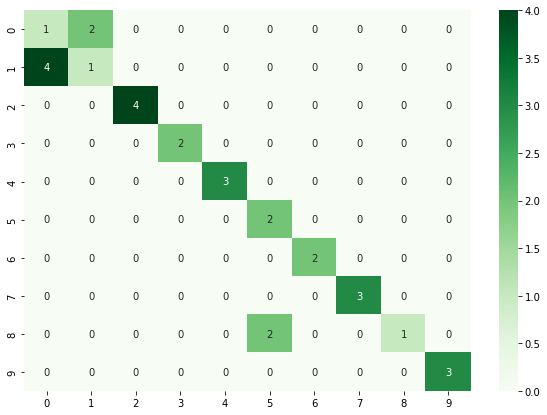

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.20      0.33      0.25         3
         2.0       0.33      0.20      0.25         5
         3.0       1.00      1.00      1.00         4
         4.0       1.00      1.00      1.00         2
         5.0       1.00      1.00      1.00         3
         6.0       0.50      1.00      0.67         2
         7.0       1.00      1.00      1.00         2
         8.0       1.00      1.00      1.00         3
         9.0       1.00      0.33      0.50         3
        10.0       1.00      1.00      1.00         3

    accuracy                           0.73        30
   macro avg       0.80      0.79      0.77        30
weighted avg       0.78      0.73      0.73        30



### **Regresión Logística**

In [ ]:
skf = StratifiedKFold(n_splits=4)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred = log_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


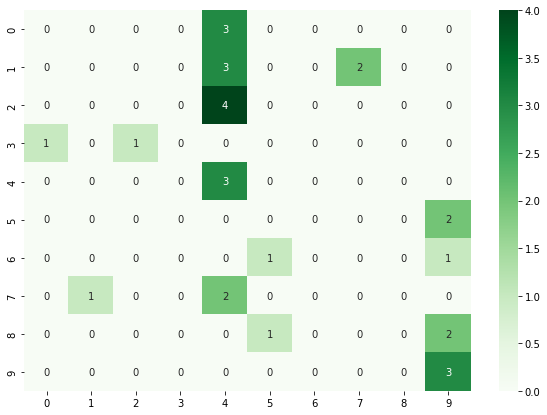

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00         5
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         2
         5.0       0.20      1.00      0.33         3
         6.0       0.00      0.00      0.00         2
         7.0       0.00      0.00      0.00         2
         8.0       0.00      0.00      0.00         3
         9.0       0.00      0.00      0.00         3
        10.0       0.38      1.00      0.55         3

    accuracy                           0.20        30
   macro avg       0.06      0.20      0.09        30
weighted avg       0.06      0.20      0.09        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **ALGORITMO 3**

In [ ]:
import pandas as pd

temp_alg3 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/temp_alg3.csv")
temp_alg3 = temp_alg3.drop(['Unnamed: 0'], axis=1)
print(temp_alg3)

volt_alg3 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/volt_alg3.csv")
volt_alg3 = volt_alg3.drop(['Unnamed: 0', 'id', 'alg'], axis=1)
print(volt_alg3)

     id  alg  time    3    4    5    6    7    8    9  ...  99993  99994  \
0     1    1     1  941  939  941  941  941  940  940  ...    941    941   
1     1    1     2  941  941  941  942  940  940  940  ...    941    940   
2     1    1     3  941  941  940  941  940  939  940  ...    941    940   
3     1    1     4  941  941  940  939  940  940  940  ...    939    940   
4     1    1     5  941  940  940  940  940  940  940  ...    940    941   
..   ..  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
995  10    1   996  939  939  941  939  940  939  940  ...    940    938   
996  10    1   997  941  941  940  938  940  939  940  ...    938    939   
997  10    1   998  940  939  941  941  940  938  940  ...    940    939   
998  10    1   999  939  940  939  940  938  939  940  ...    940    940   
999  10    1  1000  939  940  939  939  939  940  939  ...    940    939   

     99995  99996  99997  99998  99999  100000  100001  100002  
0      941    940    9

In [ ]:
alg3 = pd.merge(temp_alg3, volt_alg3, on='time', suffixes=('_1', '_2'))
alg3

alg3_diezmado = []
for i in range(len(alg3)):
  if(i % 10 == 0):
    alg3_diezmado = np.append(alg3_diezmado, alg3.iloc[i], axis = 0)
alg3_diezmado = np.reshape(alg3_diezmado, (100,200003))
alg3_diezmado = pd.DataFrame(alg3_diezmado)
print(alg3_diezmado)

    0       1       2       3       4       5       6       7       8       \
0      1.0     1.0     1.0   941.0   939.0   941.0   941.0   941.0   940.0   
1      1.0     1.0    11.0   940.0   941.0   940.0   940.0   942.0   941.0   
2      1.0     1.0    21.0   940.0   941.0   940.0   941.0   943.0   940.0   
3      1.0     1.0    31.0   936.0   936.0   936.0   936.0   936.0   937.0   
4      1.0     1.0    41.0   937.0   938.0   938.0   937.0   936.0   937.0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
95    10.0     1.0   951.0   940.0   939.0   940.0   943.0   939.0   940.0   
96    10.0     1.0   961.0   939.0   938.0   939.0   938.0   940.0   940.0   
97    10.0     1.0   971.0   939.0   940.0   940.0   939.0   939.0   939.0   
98    10.0     1.0   981.0   939.0   939.0   939.0   940.0   940.0   939.0   
99    10.0     1.0   991.0   939.0   940.0   939.0   939.0   940.0   939.0   

    9       ...  199993  199994  199995  199996  199997  199998

In [ ]:
Y = alg3_diezmado.iloc[:,0]
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
95    10.0
96    10.0
97    10.0
98    10.0
99    10.0
Name: 0, Length: 100, dtype: float64

In [ ]:
X = alg3_diezmado.iloc[:, 3:]
X

,3,4,5,6,7,8,9,10,11,12,...,199993,199994,199995,199996,199997,199998,199999,200000,200001,200002
0,941.0,939.0,941.0,941.0,941.0,940.0,940.0,940.0,941.0,940.0,...,1489.0,1490.0,1490.0,1491.0,1490.0,1489.0,1490.0,1489.0,1489.0,1490.0
1,940.0,941.0,940.0,940.0,942.0,941.0,940.0,943.0,941.0,941.0,...,1489.0,1489.0,1490.0,1490.0,1490.0,1490.0,1489.0,1489.0,1492.0,1489.0
2,940.0,941.0,940.0,941.0,943.0,940.0,941.0,941.0,940.0,941.0,...,1489.0,1490.0,1490.0,1490.0,1490.0,1490.0,1491.0,1489.0,1489.0,1490.0
3,936.0,936.0,936.0,936.0,936.0,937.0,937.0,936.0,937.0,937.0,...,1489.0,1490.0,1490.0,1490.0,1489.0,1489.0,1490.0,1490.0,1490.0,1489.0
4,937.0,938.0,938.0,937.0,936.0,937.0,937.0,936.0,937.0,937.0,...,1490.0,1490.0,1490.0,1489.0,1490.0,1490.0,1490.0,1490.0,1490.0,1489.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,940.0,939.0,940.0,943.0,939.0,940.0,940.0,940.0,938.0,938.0,...,1503.0,1503.0,1503.0,1503.0,1503.0,1504.0,1503.0,1503.0,1503.0,1503.0
96,939.0,938.0,939.0,938.0,940.0,940.0,939.0,939.0,940.0,940.0,...,1502.0,1503.0,1503.0,1503.0,1503.0,1503.0,1503.0,1502.0,1503.0,1504.0
97,939.0,940.0,940.0,939.0,939.0,939.0,939.0,939.0,940.0,939.0,...,1503.0,1502.0,1504.0,1503.0,1503.0,1503.0,1502.0,1503.0,1503.0,1502.0
98,939.0,939.0,939.0,940.0,940.0,939.0,939.0,940.0,939.0,940.0,...,1503.0,1504.0,1503.0,1503.0,1503.0,1503.0,1502.0,1502.0,1502.0,1502.0


### **kNN**


In [ ]:
skf = StratifiedKFold(n_splits=2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
classifier = KNeighborsClassifier(n_neighbors=4)
#fit the model using the training data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

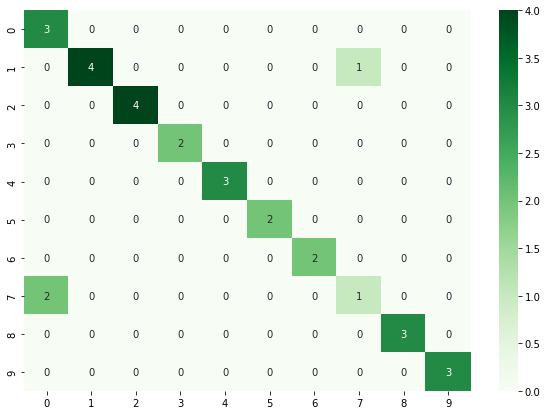

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.60      1.00      0.75         3
         2.0       1.00      0.80      0.89         5
         3.0       1.00      1.00      1.00         4
         4.0       1.00      1.00      1.00         2
         5.0       1.00      1.00      1.00         3
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00         2
         8.0       0.50      0.33      0.40         3
         9.0       1.00      1.00      1.00         3
        10.0       1.00      1.00      1.00         3

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.91      0.90      0.90        30



### **Regresión Logística**

In [ ]:
skf = StratifiedKFold(n_splits=4)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred = log_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


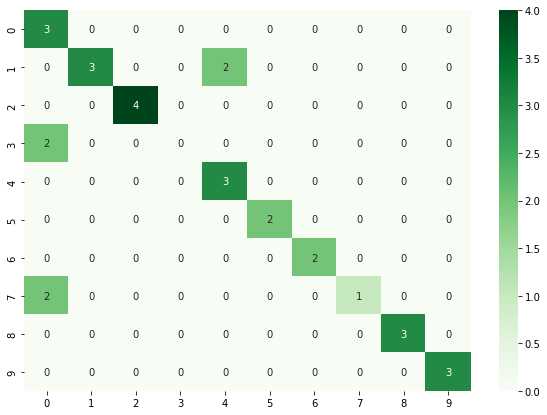

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.43      1.00      0.60         3
         2.0       1.00      0.60      0.75         5
         3.0       1.00      1.00      1.00         4
         4.0       0.00      0.00      0.00         2
         5.0       0.60      1.00      0.75         3
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00         2
         8.0       1.00      0.33      0.50         3
         9.0       1.00      1.00      1.00         3
        10.0       1.00      1.00      1.00         3

    accuracy                           0.80        30
   macro avg       0.80      0.79      0.76        30
weighted avg       0.84      0.80      0.78        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Exportar los datos**

In [ ]:
temp_alg3_diezmado.rename(columns={temp_alg3_diezmado.columns[0]:'id'}, inplace=True)
temp_alg3_diezmado.rename(columns={temp_alg3_diezmado.columns[2]:'time'}, inplace=True)
temp_alg3_diezmado

,id,1,time,3,4,5,6,7,8,9,...,99993,99994,99995,99996,99997,99998,99999,100000,100001,100002
0,1.0,1.0,1.0,941.0,939.0,941.0,941.0,941.0,940.0,940.0,...,941.0,941.0,941.0,940.0,940.0,941.0,941.0,941.0,941.0,940.0
1,1.0,1.0,11.0,940.0,941.0,940.0,940.0,942.0,941.0,940.0,...,941.0,941.0,940.0,941.0,939.0,940.0,940.0,940.0,941.0,939.0
2,1.0,1.0,21.0,940.0,941.0,940.0,941.0,943.0,940.0,941.0,...,940.0,939.0,941.0,941.0,940.0,939.0,942.0,941.0,940.0,941.0
3,1.0,1.0,31.0,936.0,936.0,936.0,936.0,936.0,937.0,937.0,...,936.0,938.0,937.0,936.0,936.0,936.0,937.0,936.0,937.0,938.0
4,1.0,1.0,41.0,937.0,938.0,938.0,937.0,936.0,937.0,937.0,...,937.0,937.0,937.0,936.0,937.0,936.0,937.0,936.0,937.0,937.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10.0,1.0,951.0,940.0,939.0,940.0,943.0,939.0,940.0,940.0,...,939.0,940.0,938.0,939.0,941.0,938.0,940.0,938.0,939.0,940.0
96,10.0,1.0,961.0,939.0,938.0,939.0,938.0,940.0,940.0,939.0,...,938.0,940.0,939.0,940.0,940.0,939.0,939.0,938.0,939.0,939.0
97,10.0,1.0,971.0,939.0,940.0,940.0,939.0,939.0,939.0,939.0,...,940.0,939.0,940.0,940.0,940.0,939.0,939.0,941.0,940.0,938.0
98,10.0,1.0,981.0,939.0,939.0,939.0,940.0,940.0,939.0,939.0,...,940.0,939.0,939.0,940.0,939.0,939.0,939.0,940.0,940.0,939.0


In [ ]:
volt_alg3_diezmado.rename(columns={volt_alg3_diezmado.columns[0]:'id'}, inplace=True)
volt_alg3_diezmado.rename(columns={volt_alg3_diezmado.columns[2]:'time'}, inplace=True)
volt_alg3_diezmado

,id,1,time,3,4,5,6,7,8,9,...,99993,99994,99995,99996,99997,99998,99999,100000,100001,100002
0,1.0,1.0,1.0,1490.0,1490.0,1492.0,1489.0,1491.0,1489.0,1489.0,...,1489.0,1490.0,1490.0,1491.0,1490.0,1489.0,1490.0,1489.0,1489.0,1490.0
1,1.0,1.0,11.0,1490.0,1489.0,1490.0,1489.0,1491.0,1490.0,1489.0,...,1489.0,1489.0,1490.0,1490.0,1490.0,1490.0,1489.0,1489.0,1492.0,1489.0
2,1.0,1.0,21.0,1489.0,1490.0,1490.0,1490.0,1490.0,1490.0,1489.0,...,1489.0,1490.0,1490.0,1490.0,1490.0,1490.0,1491.0,1489.0,1489.0,1490.0
3,1.0,1.0,31.0,1490.0,1489.0,1490.0,1490.0,1490.0,1489.0,1490.0,...,1489.0,1490.0,1490.0,1490.0,1489.0,1489.0,1490.0,1490.0,1490.0,1489.0
4,1.0,1.0,41.0,1490.0,1490.0,1489.0,1490.0,1489.0,1490.0,1490.0,...,1490.0,1490.0,1490.0,1489.0,1490.0,1490.0,1490.0,1490.0,1490.0,1489.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10.0,1.0,951.0,1504.0,1503.0,1504.0,1503.0,1503.0,1502.0,1503.0,...,1503.0,1503.0,1503.0,1503.0,1503.0,1504.0,1503.0,1503.0,1503.0,1503.0
96,10.0,1.0,961.0,1503.0,1502.0,1503.0,1503.0,1503.0,1502.0,1503.0,...,1502.0,1503.0,1503.0,1503.0,1503.0,1503.0,1503.0,1502.0,1503.0,1504.0
97,10.0,1.0,971.0,1503.0,1503.0,1503.0,1503.0,1503.0,1503.0,1503.0,...,1503.0,1502.0,1504.0,1503.0,1503.0,1503.0,1502.0,1503.0,1503.0,1502.0
98,10.0,1.0,981.0,1502.0,1503.0,1503.0,1503.0,1503.0,1503.0,1502.0,...,1503.0,1504.0,1503.0,1503.0,1503.0,1503.0,1502.0,1502.0,1502.0,1502.0


In [ ]:
temp_alg3_diezmado.to_csv('temp_alg3_diezmado.csv')

In [ ]:
volt_alg3_diezmado.to_csv('volt_alg3_diezmado.csv')